In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy.abc import lamda
import os

from labs.tests.test3 import Test
from labs.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje i stałe


In [2]:
eps = 1e-24

In [3]:
polygon_example_1 = [(5 , 5) , (3 , 4) , (6 , 3) , (4 , 2) , (6 , 0) , (7 , 1) , (8 , 4)]
polygon_example_2 = [(2 , 0) , (5 , 1) , (6 , 0) , (8 , 3) , (7 , 2) , (8 , 7) , (6 , 9) , (5 , 8) , (2 , 9) , (1 , 7) ,
                     (2 , 4) , (4 , 5) , (3 , 6) , (5 , 7) , (5.5 , 3) , (2 , 2) , (1 , 3) , (0 , 1)]
polygon_example_colors = [1 , 3 , 1 , 0 , 2 , 4 , 0 , 2 , 0 , 4 , 1 , 4 , 4 , 3 , 4 , 2 , 0 , 4]
polygon_example_tri = [(polygon_example_1[0] , polygon_example_1[2]) ,
                       (polygon_example_1[2] , polygon_example_1[5]) ,
                       (polygon_example_1[2] , polygon_example_1[6]) ,
                       (polygon_example_1[2] , polygon_example_1[4])]

In [4]:
def draw_polygon( polygon ) :
    vis = Visualizer( )
    points = polygon
    vis.add_polygon( polygon , fill = False )
    vis.show( )

In [5]:
def draw_polygon_colors( polygon , colors , title = "" ) :
    points_start = []
    points_end = []
    points_connect = []
    points_divide = []
    points_regular = []
    for i in range( len( polygon ) ) :
        if colors[i] == 0 :
            points_start.append( polygon[i] )
        elif colors[i] == 1 :
            points_end.append( polygon[i] )
        elif colors[i] == 2 :
            points_connect.append( polygon[i] )
        elif colors[i] == 3 :
            points_divide.append( polygon[i] )
        elif colors[i] == 4 :
            points_regular.append( polygon[i] )

    vis = Visualizer( )
    colors_start = ['green']
    color_end = ['red']
    color_connect = ['blue']
    color_divide = ['cyan']
    color_regular = ['#3B240B']
    vis.add_polygon( polygon , fill = False )
    vis.add_point( points_start , color = colors_start )
    vis.add_point( points_end , color = color_end )
    vis.add_point( points_connect , color = color_connect )
    vis.add_point( points_divide , color = color_divide )
    vis.add_point( points_regular , color = color_regular )
    vis.add_title( title )
    vis.show( )
    #vis.save( "Imgs/"+ title)

In [6]:
def draw_polygon_tri( polygon , tri ) :
    vis = Visualizer( )
    points = polygon
    tri_line_segments = tri
    vis.add_polygon( points , fill = False )
    vis.add_point( points )
    vis.add_line_segment( tri_line_segments , color = 'red' )
    vis.show( )

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

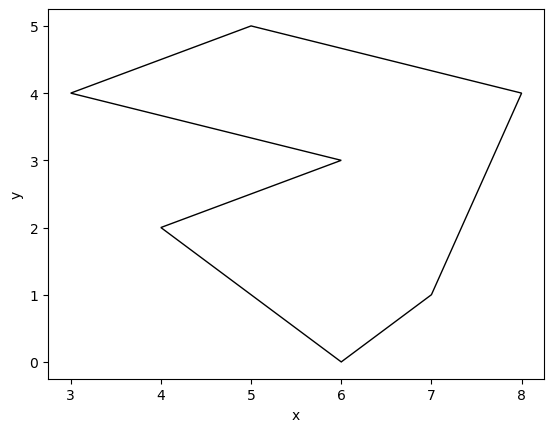

In [7]:
draw_polygon( polygon_example_1 )

Do tego celu wygeneruj wielokąty.

In [8]:
polygons = [

    ("A" , [
        (1.0619753777280363 , 1.2664462012291184) ,
        (0.6137381085618356 , 1.8719218814312275) ,
        (0.3468102965864578 , 1.5244759214840256) ,
        (0.5256015668718523 , 1.1054969697829882) ,
        (0.1529099048684947 , 1.0697304739060702) ,
        (0.3719921656407387 , 0.7478320110138097) ,
        (0.1075825405707890 , 0.6660800204379975) ,
        (0.2259373251259094 , 0.3569553060732077) ,
        (0.5331561275881367 , 0.3262983096072781) ,
        (0.4752378287632906 , 0.1398015811062066) ,
        (0.7975657526580864 , 0.1474658302226890) ,
        (0.9587297146054845 , 0.2649843166754190) ,
        (0.8857022943480697 , 0.3850575528336431) ,
        (1.3817851147174041 , 0.4514810451764905) ,
        (1.0947118074986015 , 0.5996565280951502) ,
        (1.8400951315053169 , 0.7606057595412803) ,
        (1.1022663682148857 , 0.9854237336247640) ,
        (1.3566032456631232 , 1.0876137218445292)
    ]) ,

    ("B" , [
        (1.6965584778959155 , 1.8412648849652977) ,
        (0.4324286513710130 , 1.6087826617653318) ,
        (0.4525741466144378 , 0.5255687866358203) ,
        (1.0720481253497487 , 0.2138893225655364) ,
        (1.6587856743144942 , 0.5230140369303262)
    ]) ,

    ("C" , [
        (1.0493844432008959 , 1.8259363867323330) ,
        (0.2989647453833241 , 1.3430886923939422) ,
        (0.2209009513150532 , 0.7095107654313977) ,
        (0.6993564633463909 , 0.3033055622578310) ,
        (1.7695858981533303 , 0.3441815575457371) ,
        (1.7519585898153336 , 0.7222845139588685) ,
        (0.6565472859541133 , 0.7912627560072099) ,
        (0.6792109681029661 , 1.2536724527016476) ,
        (1.7368494683827651 , 1.4759356770796370) ,
        (1.6059037493005042 , 1.6905346523411440)
    ]) ,

    ("D" , [
        (1.1098209289311700 , 1.2306797053522005) ,
        (1.5076944599888087 , 1.8872503796641920) ,
        (1.0242025741466148 , 1.6164469108818142) ,
        (1.1198936765528824 , 1.8949146287806746) ,
        (0.7623111359820931 , 1.8821408802532038) ,
        (0.7371292669278122 , 1.6190016605873083) ,
        (0.5684107442641300 , 1.8719218814312275) ,
        (0.2788192501398993 , 1.7365201470400384) ,
        (0.2637101287073308 , 1.4810451764906254) ,
        (0.4651650811415782 , 1.2076869580027534) ,
        (0.1932008953553442 , 1.0416282271456347) ,
        (0.2536373810856184 , 0.4846927913479143) ,
        (0.9008114157806384 , 0.4949117901698908) ,
        (0.8756295467263573 , 0.2803128149083838) ,
        (1.5907946278679357 , 0.4054955504775962) ,
        (0.9990207050923339 , 0.8193650027676453) ,
        (0.7849748181309459 , 1.0135259803851995) ,
        (0.8378567431449360 , 1.2613367018181301) ,
        (1.0090934527140463 , 1.1335992165434234) ,
        (1.3339395635142703 , 0.9573214868643285) ,
        (1.5907946278679357 , 0.7912627560072099) ,
        (1.7519585898153336 , 1.0390734774401407) ,
        (1.7242585338556247 , 1.2613367018181301) ,
        (1.7695858981533303 , 1.5551329179499551) ,
        (1.4799944040290995 , 1.4784904267851311) ,
        (1.3918578623391165 , 1.2204607065302240)
    ]) ,

    ("E" , [
        (1.0367935086737552 , 1.7518486452730031) ,
        (0.5356743144935647 , 1.6215564102928026) ,
        (0.2435646334639061 , 1.2536724527016476) ,
        (0.2561555679910465 , 0.7631605092467746) ,
        (0.4349468382764410 , 0.4974665398753849) ,
        (0.7245383324006718 , 0.4259335481215492) ,
        (1.0796026860660328 , 0.4054955504775962) ,
        (1.2911303861219927 , 0.5025760392863732) ,
        (1.5202853945159491 , 0.6865180180819506) ,
        (1.6008673754896481 , 0.8346935010006102) ,
        (1.6512311135982098 , 1.0876137218445292) ,
        (1.6386401790710694 , 1.2255702059412124) ,
        (1.5530218242865144 , 1.3814099379763543) ,
        (1.4321488528259658 , 1.5065926735455666) ,
        (1.2835758254057084 , 1.6164469108818142)
    ]) ,
    ("F" , [
        (0.8957750419697821 , 1.7722866429169561) ,
        (0.3216284275321770 , 1.5781256652994022) ,
        (0.1327644096250700 , 0.9803142342137756) ,
        (0.4450195858981534 , 0.3978313013611138) ,
        (1.1752937884723005 , 0.1346920816952183) ,
        (1.8627588136541695 , 0.3390720581347488) ,
        (1.0468662562954676 , 0.5230140369303262) ,
        (1.8048405148293236 , 0.6047660275061384) ,
        (1.0947118074986015 , 0.8602409980555517) ,
        (1.7418858421936212 , 0.9803142342137756) ,
        (1.1803301622831566 , 1.2076869580027534) ,
        (1.7695858981533303 , 1.3303149438664716) ,
        (1.1450755456071633 , 1.4657166782576605) ,
        (1.7595131505316179 , 1.5627971670664376) ,
        (1.6814493564633470 , 1.7799508920334386)
    ])
]

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [9]:
def is_y_monotonic( polygon ) :
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """

    highestPointIdx = polygon.index( max( polygon , key = lambda x : x[1] ) )
    lowestPointIdx = polygon.index( min( polygon , key = lambda x : x[1] ) )
    polygonSize = len( polygon )

    testFlag = True

    currentIdx = highestPointIdx
    while currentIdx != lowestPointIdx :
        lastIdx = currentIdx
        currentIdx += 1

        if currentIdx >= polygonSize :
            currentIdx = 0

        if polygon[lastIdx][1] < polygon[currentIdx][1] :
            testFlag = False

    currentIdx = highestPointIdx
    while currentIdx != lowestPointIdx :
        lastIdx = currentIdx
        currentIdx -= 1

        if currentIdx < 0 :
            currentIdx = polygonSize - 1

        if polygon[lastIdx][1] < polygon[currentIdx][1] :
            testFlag = False
    return testFlag

Przeprowadź test poprawności powyższej funkcji.

In [10]:
Test( ).runtest( 1 , is_y_monotonic )

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.031s


Sprawdź monotoniczność swojego wielokątu.

In [11]:
for (label , graph) in polygons :
    print( f" {label}:{is_y_monotonic( graph )}" )

 A:True
 B:True
 C:True
 D:False
 E:True
 F:True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

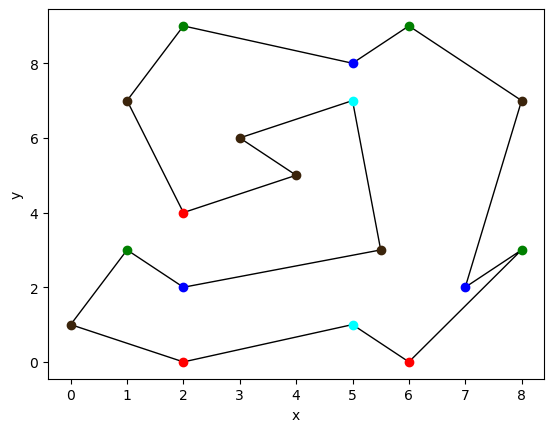

In [12]:
draw_polygon_colors( polygon_example_2 , polygon_example_colors )

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [13]:
def mat_det_3x3( a , b , c ) :
    """
    Obliczanie wyznacznika macierzy 3x3
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

In [14]:
def color_vertex( polygon ) :
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """

    polygonSize = len( polygon )
    Type = [-1 for _ in range( polygonSize )]

    for i in range( polygonSize ) :
        lastIdx = (i - 1 + polygonSize) % polygonSize
        nextIdx = (i + 1) % polygonSize

        last = polygon[lastIdx]
        current = polygon[i]
        next = polygon[nextIdx]

        det = mat_det_3x3( last , current , next )

        if abs( det ) <= eps :
            resultType = 4
        else :
            isConvex = det > eps

            if last[1] < current[1] :
                if current[1] < next[1] :
                    resultType = 4
                else :
                    resultType = (0 if isConvex else 3)
            else :
                if current[1] > next[1] :
                    resultType = 4
                else :
                    resultType = (1 if isConvex else 2)

        Type[i] = resultType

    return Type

Przeprowadź test poprawności powyższej funkcji.

In [15]:
Test( ).runtest( 2 , color_vertex )

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj swoje wielokąty z pokolorowanymi według kategorii wierzchołkami.

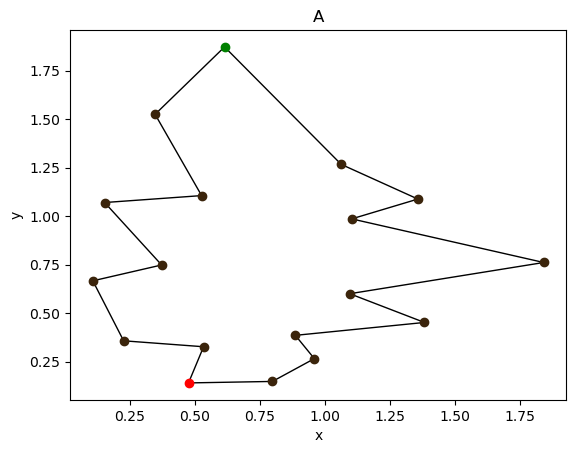

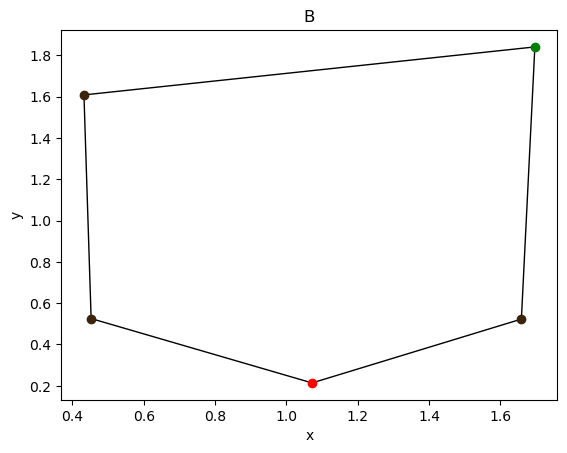

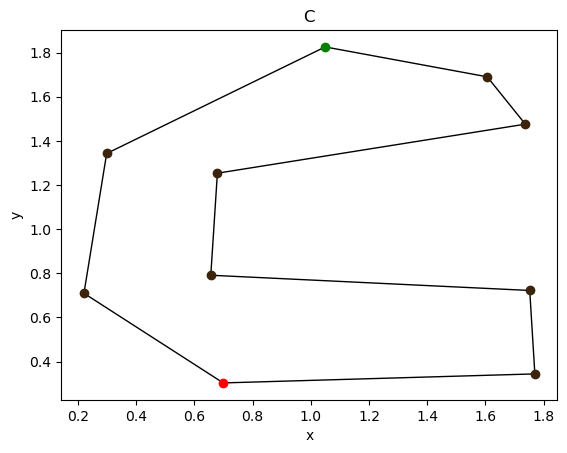

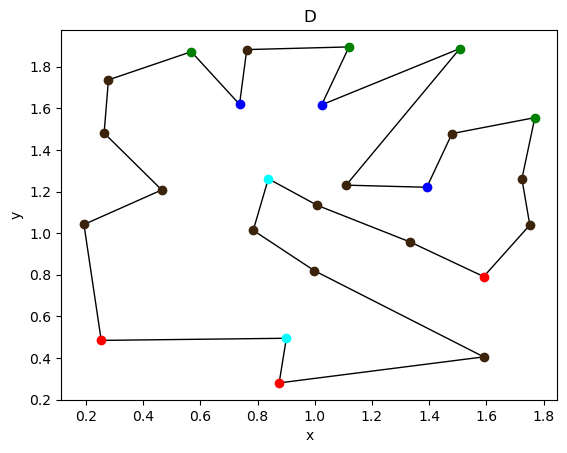

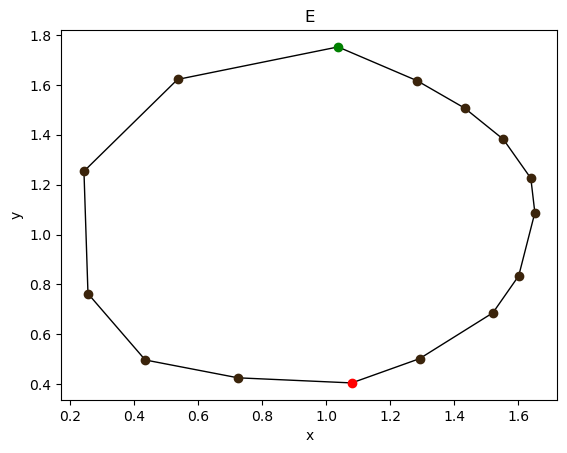

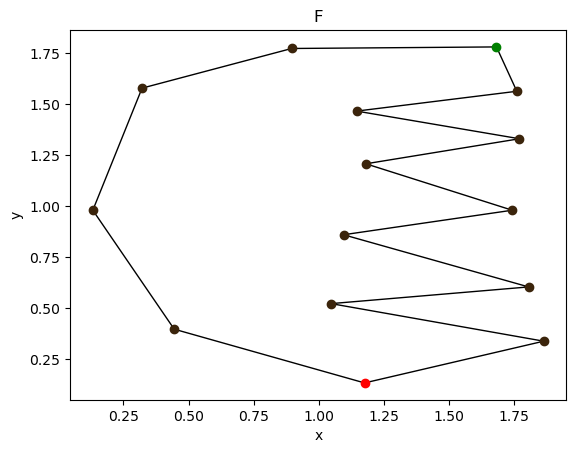

In [16]:
for (label , graph) in polygons :
    colors = color_vertex( graph )
    draw_polygon_colors( graph , colors , label )

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

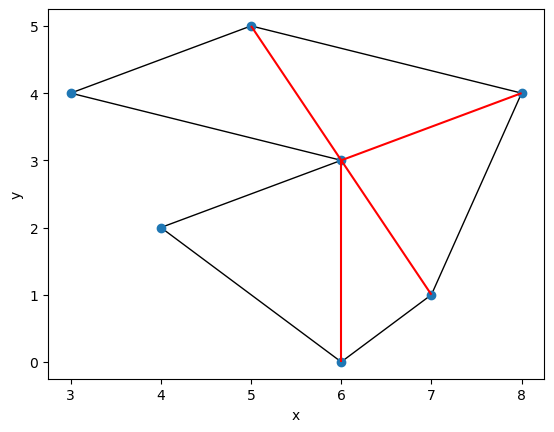

In [17]:
draw_polygon_tri( polygon_example_1 , polygon_example_tri )

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [18]:
def triangulation( polygon ) :
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """

    def sideClassifaction( ) :
        currentIdx = (highestPointIdx + 1) % polygonSize
        while currentIdx != lowestPointIdx :
            Chain[currentIdx] = "Left"
            currentIdx = (currentIdx + 1) % polygonSize

        currentIdx = (highestPointIdx - 1 + polygonSize) % polygonSize
        while currentIdx != lowestPointIdx :
            Chain[currentIdx] = "Right"
            currentIdx = (currentIdx - 1 + polygonSize) % polygonSize

    polygonSize = len( polygon )

    highestPointIdx = polygon.index( max( polygon , key = lambda x : x[1] ) )
    lowestPointIdx = polygon.index( min( polygon , key = lambda x : x[1] ) )

    Chain = { }
    Chain[highestPointIdx] = "Both"
    Chain[lowestPointIdx] = "Both"
    sideClassifaction( )

    Sorted = sorted( range( polygonSize ) , key = lambda i : -polygon[i][1] )

    Stack = []
    Stack.append( Sorted[0] )
    Stack.append( Sorted[1] )

    Diagonals = []

    for i in range( 2 , polygonSize ) :
        currentVIdx = Sorted[i]

        if currentVIdx == lowestPointIdx :
            for j in range( 1 , len( Stack ) - 1 ) :
                Diagonals.append( tuple( sorted( (currentVIdx , Stack[j]) ) ) )
            return Diagonals
        topIdx = Stack[-1]

        if Chain[topIdx] != Chain[currentVIdx] :
            for j in range( 1 , len( Stack ) ) :
                Diagonals.append( tuple( sorted( (currentVIdx , Stack[j]) ) ) )

            last = Stack[-1]
            Stack = [last , currentVIdx]

        else :
            is_left = (Chain[currentVIdx] == "Left")

            while len( Stack ) >= 2 :
                topIdx = Stack[-1]
                secondIdx = Stack[-2]

                det = mat_det_3x3( polygon[secondIdx] , polygon[topIdx] , polygon[currentVIdx] )

                isInside = (det > eps) if is_left else (det < -eps)

                if isInside :
                    Stack.pop( )
                    Diagonals.append( tuple( sorted( (currentVIdx , secondIdx) ) ) )
                else :
                    break

            Stack.append( currentVIdx )
    return Diagonals

In [19]:
def draw_gif_tri( polygon , title = '' ) :
    """
   Funkcja dokonuje triangulacji wielokąta monotonicznego.
   :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
   :return: vis , Diagonals- obiekt Visualizer , lista indeksów krawedzi triangulacji.
   """

    def sideClassifaction( ) :
        currentIdx = (highestPointIdx + 1) % polygonSize
        while currentIdx != lowestPointIdx :
            Chain[currentIdx] = "Left"
            currentIdx = (currentIdx + 1) % polygonSize

        currentIdx = (highestPointIdx - 1 + polygonSize) % polygonSize
        while currentIdx != lowestPointIdx :
            Chain[currentIdx] = "Right"
            currentIdx = (currentIdx - 1 + polygonSize) % polygonSize

    vis = Visualizer( )
    vis.add_title( f"Triangulacja wielokąta monotonicznego : {title}" )

    n = len( polygon )
    vis.add_polygon( polygon , fill = False , color = "black" )
    vis.add_line_segment( [(polygon[i] , polygon[(i + 1) % n]) for i in range( n )] , color = "black" )
    pointsVis = []

    polygonSize = len( polygon )
    highestPointIdx = polygon.index( max( polygon , key = lambda x : x[1] ) )
    lowestPointIdx = polygon.index( min( polygon , key = lambda x : x[1] ) )

    Chain = { }
    Chain[highestPointIdx] = "Both"
    Chain[lowestPointIdx] = "Both"

    vis.add_point( polygon , color = "green" )
    vis.add_point( polygon[highestPointIdx] , color = "blue" )
    vis.add_point( polygon[lowestPointIdx] , color = "blue" )

    sideClassifaction( )

    Sorted = sorted( range( polygonSize ) , key = lambda i : -polygon[i][1] )

    Stack = []
    Stack.append( Sorted[0] )
    Stack.append( Sorted[1] )
    vis.add_point( polygon[Sorted[0]] , color = "red" )
    vis.add_point( polygon[Sorted[1]] , color ="red" )

    Diagonals = []

    for i in range( 2 , polygonSize ) :
        currentVIdx = Sorted[i]

        if currentVIdx == lowestPointIdx :
            for j in range( 1 , len( Stack ) - 1 ) :
                diag = tuple( sorted( (currentVIdx , Stack[j]) ) )
                Diagonals.append( diag )
                vis.add_line_segment( (polygon[diag[0]] , polygon[diag[1]]) , color = "red" )
                vis.add_point( polygon[Stack[j]] , color = "black" )
            return vis , Diagonals

        topIdx = Stack[-1]

        if Chain[topIdx] != Chain[currentVIdx] :
            for j in range( 1 , len( Stack ) ) :
                diag = tuple( sorted( (currentVIdx , Stack[j]) ) )

                Diagonals.append( diag )
                vis.add_line_segment( (polygon[diag[0]] , polygon[diag[1]]) , color = "red" )
                vis.add_point( polygon[Stack[j]] , color = "black" )

            last = Stack[-1]
            Stack = [last , currentVIdx]

        else :
            is_left = (Chain[currentVIdx] == "Left")

            while len( Stack ) >= 2 :
                topIdx = Stack[-1]
                secondIdx = Stack[-2]
                det = mat_det_3x3( polygon[secondIdx] , polygon[topIdx] , polygon[currentVIdx] )
                isInside = (det > eps) if is_left else (det < -eps)

                if isInside :
                    vis.add_point( polygon[Stack.pop( )] , color = "black" )

                    diag = tuple( sorted( (currentVIdx , secondIdx) ) )
                    Diagonals.append( diag )
                    vis.add_line_segment( (polygon[diag[0]] , polygon[diag[1]]) , color = "red" )
                else :
                    break

            Stack.append( currentVIdx )
            vis.add_point( polygon[Stack[-1]] , color = "red" )

    return (vis , Diagonals)

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: Stos, Słownik.
W moim algorytmie użyłem stosu. Dzięki jego prostocie i stałej złożoności operacji: append() (push) i pop() – O(1), zapewnia on liniową złożoność czasową O(n) dla głównej części algorytmu, a także czytelną i prostą do zaimplementowania składnię.

Przeprowadź testy poprawności powyższej funkcji.


In [20]:
Test( ).runtest( 3 , triangulation )

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

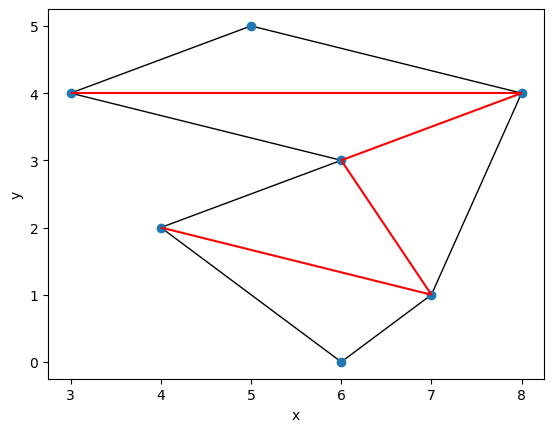

In [21]:
polygon = polygon_example_1
tri = triangulation( polygon )
draw_polygon_tri( polygon , [(polygon[x] , polygon[y]) for (x , y) in tri] )

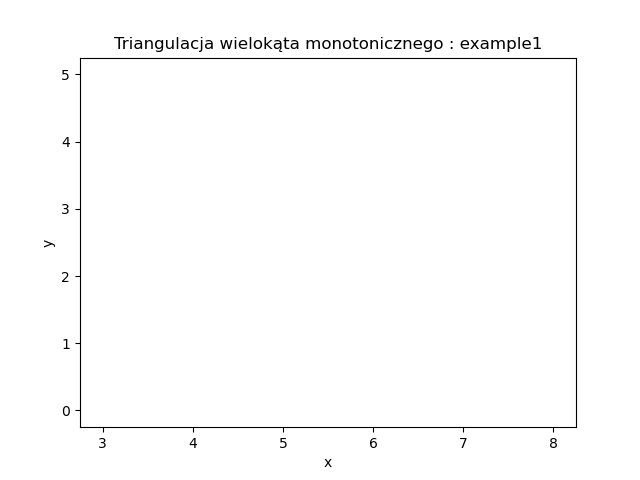

In [22]:
title = "example1"
vis , graph = draw_gif_tri( polygon , title )
vis.show_gif( interval = 1000 )

In [23]:
def printSaveDiagonals( diagonals , graph , label ) :
    RtextIdx = ""
    RtextV = ""
    RtextGraph = ""

    for (x , y) in diagonals :
        textIdx = f"({x} , {y}),"
        textV = f"({graph[x]} , {graph[y]}),"

        RtextIdx += textIdx
        RtextV += textV

    print( f"Indeksy krawędzi triangulacji wielokąta monotonicznego : {label} :\n{RtextIdx}" )
    print( f"Wierzchołki krawędzi triangulacji wielokąta monotonicznego : {label} :\n{RtextV}" )

    for (x , y) in graph :
        textGraph = f"({x} , {y}),"
        RtextGraph += textGraph

    with open( "Reports/" + label + "_Diagonals_idx.txt" , "w" , encoding = "utf-8" ) as file :
        file.write( RtextIdx )
    with open( "Reports/" + label + "_Diagonals_v.txt" , "w" , encoding = "utf-8" ) as file :
        file.write( RtextV )
    with open( "Reports/" + label + "_graph.txt" , "w" , encoding = "utf-8" ) as file :
        file.write( RtextGraph )


In [24]:
idx = 0

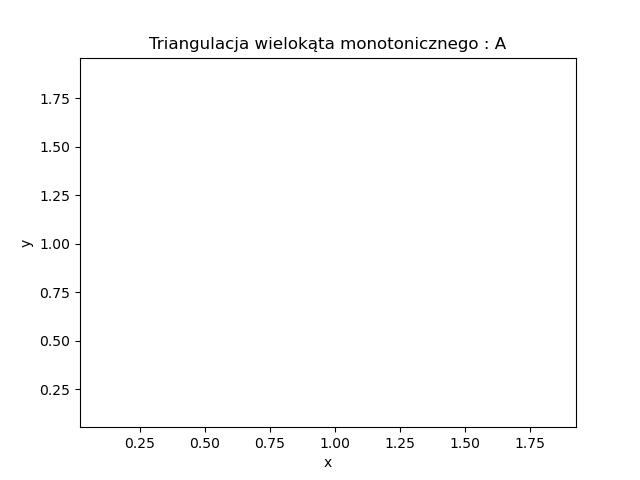

In [25]:
label , graph = polygons[idx]
vis , diagonals = draw_gif_tri( graph , label )
vis.show_gif( interval = 400 )

In [26]:
vis.save_gif( "Imgs/" + label )

In [27]:
printSaveDiagonals( diagonals , graph , label )

Indeksy krawędzi triangulacji wielokąta monotonicznego : A :
(0 , 2),(0 , 3),(3 , 17),(4 , 17),(4 , 16),(4 , 15),(5 , 15),(6 , 15),(6 , 14),(6 , 13),(6 , 12),(7 , 12),(8 , 12),(8 , 11),(8 , 10),
Wierzchołki krawędzi triangulacji wielokąta monotonicznego : A :
((1.0619753777280363, 1.2664462012291184) , (0.3468102965864578, 1.5244759214840256)),((1.0619753777280363, 1.2664462012291184) , (0.5256015668718523, 1.1054969697829882)),((0.5256015668718523, 1.1054969697829882) , (1.3566032456631232, 1.0876137218445292)),((0.1529099048684947, 1.0697304739060702) , (1.3566032456631232, 1.0876137218445292)),((0.1529099048684947, 1.0697304739060702) , (1.1022663682148857, 0.985423733624764)),((0.1529099048684947, 1.0697304739060702) , (1.840095131505317, 0.7606057595412803)),((0.3719921656407387, 0.7478320110138097) , (1.840095131505317, 0.7606057595412803)),((0.107582540570789, 0.6660800204379975) , (1.840095131505317, 0.7606057595412803)),((0.107582540570789, 0.6660800204379975) , (1.09471180749

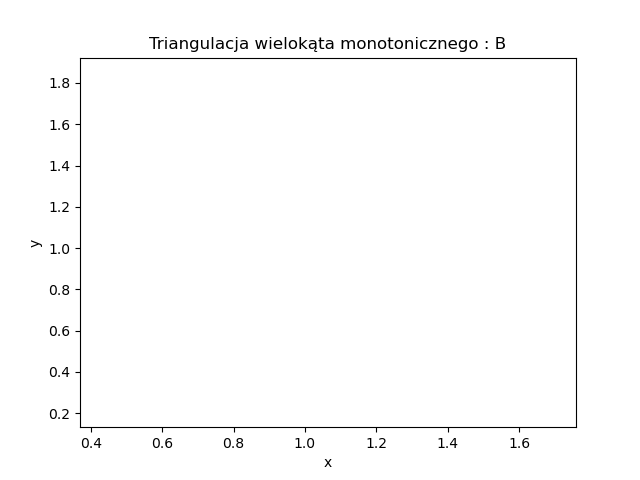

In [28]:
idx += 1
label , graph = polygons[idx]
vis , diagonals = draw_gif_tri( graph , label )
vis.show_gif( interval = 400 )

In [29]:
vis.save_gif( "Imgs/" + label )

In [30]:
printSaveDiagonals( diagonals , graph , label )

Indeksy krawędzi triangulacji wielokąta monotonicznego : B :
(0 , 2),(2 , 4),
Wierzchołki krawędzi triangulacji wielokąta monotonicznego : B :
((1.6965584778959155, 1.8412648849652977) , (0.4525741466144378, 0.5255687866358203)),((0.4525741466144378, 0.5255687866358203) , (1.6587856743144942, 0.5230140369303262)),


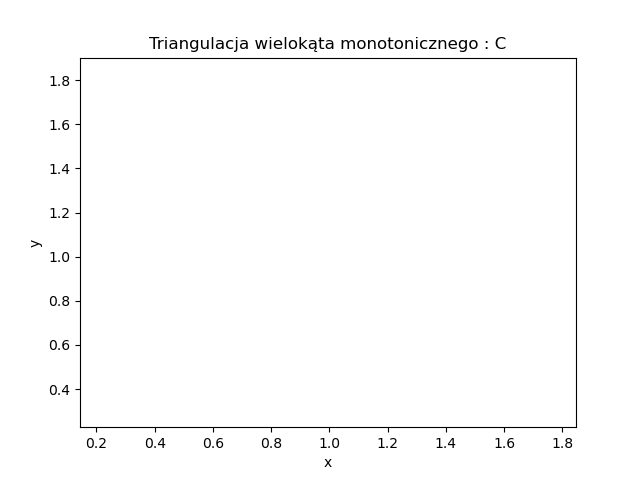

In [31]:
idx += 1
label , graph = polygons[idx]
vis , diagonals = draw_gif_tri( graph , label )
vis.show_gif( interval = 400 )

In [32]:
vis.save_gif( "Imgs/" + label )

In [33]:
printSaveDiagonals( diagonals , graph , label )


Indeksy krawędzi triangulacji wielokąta monotonicznego : C :
(0 , 8),(1 , 8),(1 , 7),(1 , 6),(2 , 6),(2 , 5),(2 , 4),
Wierzchołki krawędzi triangulacji wielokąta monotonicznego : C :
((1.0493844432008959, 1.825936386732333) , (1.736849468382765, 1.475935677079637)),((0.2989647453833241, 1.3430886923939422) , (1.736849468382765, 1.475935677079637)),((0.2989647453833241, 1.3430886923939422) , (0.6792109681029661, 1.2536724527016476)),((0.2989647453833241, 1.3430886923939422) , (0.6565472859541133, 0.7912627560072099)),((0.2209009513150532, 0.7095107654313977) , (0.6565472859541133, 0.7912627560072099)),((0.2209009513150532, 0.7095107654313977) , (1.7519585898153336, 0.7222845139588685)),((0.2209009513150532, 0.7095107654313977) , (1.7695858981533303, 0.3441815575457371)),


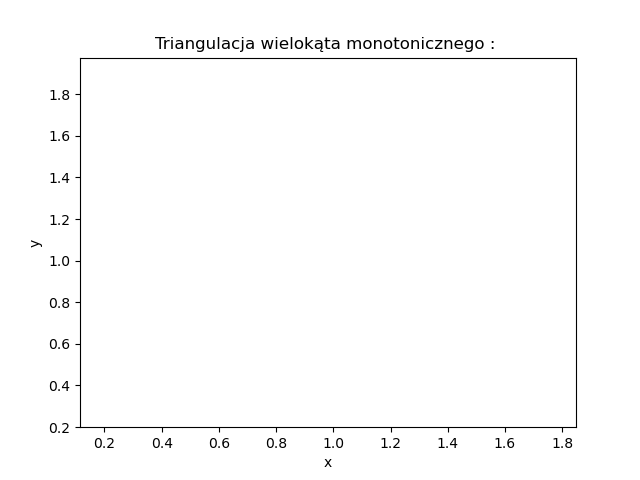

In [34]:
idx += 1
label , graph = polygons[idx]
vis , diagonals = draw_gif_tri( graph , label )
vis.show_gif( interval = 400 )

In [35]:
vis.save_gif( "Imgs/" + label )

In [36]:
printSaveDiagonals( diagonals , graph , label )


Indeksy krawędzi triangulacji wielokąta monotonicznego : D :
(1 , 4),(1 , 6),(1 , 7),(1 , 5),(2 , 5),(5 , 23),(8 , 23),(8 , 24),(8 , 17),(0 , 17),(9 , 17),(0 , 9),(9 , 25),(9 , 18),(10 , 18),(10 , 21),(10 , 16),(10 , 19),(10 , 15),(12 , 15),(12 , 20),(12 , 14),(11 , 14),
Wierzchołki krawędzi triangulacji wielokąta monotonicznego : D :
((1.5076944599888087, 1.887250379664192) , (0.7623111359820931, 1.8821408802532038)),((1.5076944599888087, 1.887250379664192) , (0.56841074426413, 1.8719218814312275)),((1.5076944599888087, 1.887250379664192) , (0.2788192501398993, 1.7365201470400384)),((1.5076944599888087, 1.887250379664192) , (0.7371292669278122, 1.6190016605873083)),((1.0242025741466148, 1.6164469108818142) , (0.7371292669278122, 1.6190016605873083)),((0.7371292669278122, 1.6190016605873083) , (1.7695858981533303, 1.5551329179499551)),((0.2637101287073308, 1.4810451764906254) , (1.7695858981533303, 1.5551329179499551)),((0.2637101287073308, 1.4810451764906254) , (1.4799944040290995, 1.

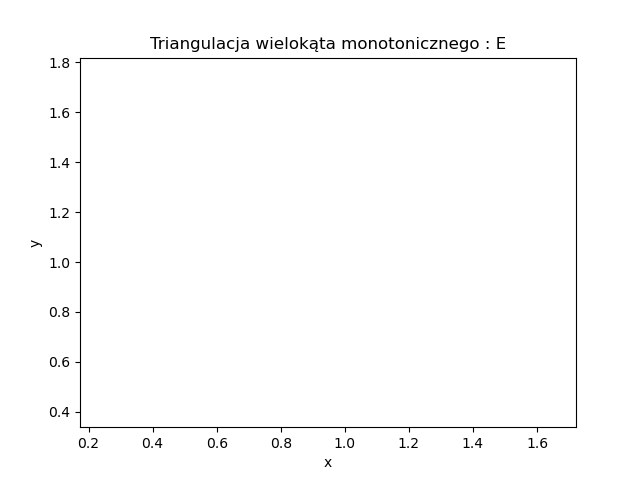

In [37]:
idx += 1
label , graph = polygons[idx]
vis , diagonals = draw_gif_tri( graph , label )
vis.show_gif( interval = 400 )

In [38]:
vis.save_gif( "Imgs/" + label )

In [39]:
printSaveDiagonals( diagonals , graph , label )


Indeksy krawędzi triangulacji wielokąta monotonicznego : E :
(1 , 14),(1 , 13),(1 , 12),(2 , 12),(2 , 11),(2 , 10),(2 , 9),(3 , 9),(3 , 8),(3 , 7),(4 , 7),(5 , 7),
Wierzchołki krawędzi triangulacji wielokąta monotonicznego : E :
((0.5356743144935647, 1.6215564102928026) , (1.2835758254057084, 1.6164469108818142)),((0.5356743144935647, 1.6215564102928026) , (1.4321488528259658, 1.5065926735455666)),((0.5356743144935647, 1.6215564102928026) , (1.5530218242865144, 1.3814099379763543)),((0.2435646334639061, 1.2536724527016476) , (1.5530218242865144, 1.3814099379763543)),((0.2435646334639061, 1.2536724527016476) , (1.6386401790710694, 1.2255702059412124)),((0.2435646334639061, 1.2536724527016476) , (1.6512311135982098, 1.0876137218445292)),((0.2435646334639061, 1.2536724527016476) , (1.600867375489648, 0.8346935010006102)),((0.2561555679910465, 0.7631605092467746) , (1.600867375489648, 0.8346935010006102)),((0.2561555679910465, 0.7631605092467746) , (1.5202853945159491, 0.6865180180819506))

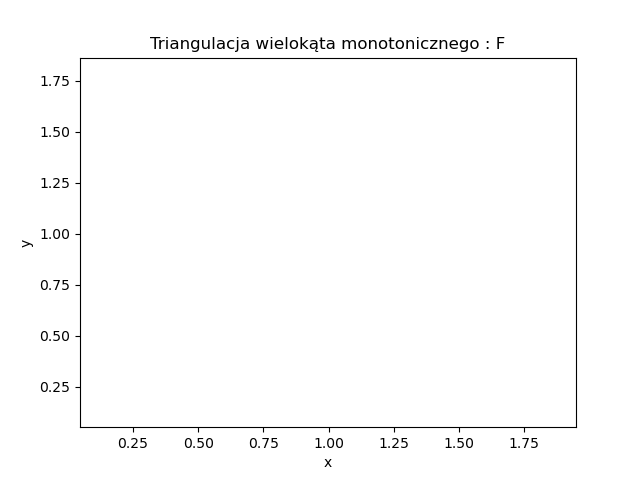

In [40]:
idx += 1
label , graph = polygons[idx]
vis , diagonals = draw_gif_tri( graph , label )
vis.show_gif( interval = 400 )

In [41]:
vis.save_gif( "Imgs/" + label )

In [ ]:
printSaveDiagonals( diagonals , graph , label )

In [42]:
%matplotlib tk

def placeVertex( xCoord , yCoord ) :
    pointObj = axes.scatter( xCoord , yCoord ,
                             s = 100 , c = 'blue' , marker = 'o' ,
                             edgecolors = 'navy' , linewidths = 2 , zorder = 5 )
    markers.append( pointObj )
    figure.canvas.draw_idle( )


def connectV( startP , endP , dashStyle = 'solid' , lineColor = 'blue' , thick = 2.5 , alpha = 1.0 ) :
    xArr = [startP[0] , endP[0]]
    yArr = [startP[1] , endP[1]]

    lineObj , = axes.plot( xArr , yArr ,
                           linestyle = dashStyle ,
                           color = lineColor ,
                           linewidth = thick ,
                           alpha = alpha ,
                           zorder = 3 )
    edges.append( lineObj )
    figure.canvas.draw_idle( )
    return lineObj


def updatePreview( ) :
    global previewLine

    if previewLine is not None :
        previewLine.remove( )
        previewLine = None

    if len( shapeV ) >= 3 :
        lastV = shapeV[-1]
        firstV = shapeV[0]
        previewLine = connectV( lastV , firstV ,
                                dashStyle = 'dotted' ,
                                lineColor = 'orange' ,
                                thick = 2.0 ,
                                alpha = 0.7 )


def handleClick( mouseEvt ) :
    global isClosed , previewLine

    if not mouseEvt.dblclick or isClosed :
        return

    if mouseEvt.button == 1 :
        if mouseEvt.xdata is None or mouseEvt.ydata is None :
            return

        xPos = mouseEvt.xdata
        yPos = mouseEvt.ydata

        shapeV.append( [xPos , yPos] )
        placeVertex( xPos , yPos )

        if len( shapeV ) >= 2 :
            prevIdx = len( shapeV ) - 2
            connectV( shapeV[prevIdx] , shapeV[-1] )
        updatePreview( )

    elif mouseEvt.button == 3 :
        if len( shapeV ) < 3 :
            return
        if previewLine is not None :
            previewLine.remove( )
            previewLine = None
        connectV( shapeV[-1] , shapeV[0] )

        isClosed = True
        axes.set_title( "Wielokąt ukończony! Okno zostanie zamknięte..." , fontsize = 11 , color = 'green' )
        figure.canvas.draw_idle( )
        plt.pause( 0.4 )
        plt.pause( 1.6 )
        plt.close( figure )


shapeV = []
previewLine = None
markers = []
edges = []
isClosed = False

figure , axes = plt.subplots( figsize = (9 , 9) )
plt.get_current_fig_manager( ).set_window_title( "Edytor Wielokątów" )

axes.set_title( "Dodaj wierzchołek: LPM x2\nZamknij wielokąt: PPM x2 (wymagane ≥3 punkty)" ,
                fontsize = 10 , pad = 12 )
axes.set_xlim( [0 , 2] )
axes.set_ylim( [0 , 2] )
axes.set_xlabel( 'Oś X' , fontsize = 10 )
axes.set_ylabel( 'Oś Y' , fontsize = 10 )

connId = figure.canvas.mpl_connect( 'button_press_event' , handleClick )

plt.tight_layout( )
plt.ion( )
plt.show( )


In [46]:
#%matplotlib inline

if len( shapeV ) < 3 :
    print( "BŁĄD: Wprowadzono mniej niż 3 wierzchołki!" )
    print( f"Liczba wprowadzonych punktów: {len( shapeV )}" )
else :
    vis = Visualizer( )
    vis.axis_equal( )
    vis.add_polygon( shapeV , fill = False , color = 'blue' )
    for idx , vertex in enumerate( shapeV ) :
        vis.add_point( vertex , color = 'red' )

    def saveImage( vis , fileDir , fileName ) :
        idx = len( os.listdir( fileDir ) ) + 1
        filePath = fileDir + fileName + str(idx)
        vis.save( filePath )
    saveImage( vis , "Imgs/Hand/" , "Graph" )

    vis.show( )

    def saveReport( text , fileDir , fileName ) :
        idx = len( os.listdir( fileDir ) ) + 1
        filePath = fileDir + fileName + str(idx) + ".txt"

        with open( filePath , "w" ) as file :
            file.write( text )

    def printVertices( graph , title ) :
        print( f"\nLiczba wierzchołków: {len( graph )}" )
        print( f"Współrzędne wierzchołków wielokąta - {title} :" )

        formattedGraph = [ f"({x:.16f} , {y:.16f})" for (x,y) in graph ]
        Rtext = ", ".join( formattedGraph )
        print( Rtext )

        saveReport( Rtext ,"Reports/Hand/" , "Graph" )

    printVertices( shapeV , "wprowadzonego ręcznie" )


Liczba wierzchołków: 6
Współrzędne wierzchołków wielokąta - wprowadzonego ręcznie :
(0.5860380526021267 , 1.4273954326752485), (0.5759653049804143 , 0.9649857359808109), (1.3566032456631232 , 0.9624309862753169), (1.7670677112479021 , 1.4350596817917309), (1.3289031897034140 , 1.7825056417389327), (0.8907386681589260 , 1.7007536511631205)
